# E-commerce Sales Data Analysis

**Objective:**  
To analyze sales and profit performance across categories and regions using Python.

**Tools Used:**  
Python, Pandas, NumPy, Matplotlib


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Loading

In this step, the dataset is loaded using Pandas to begin exploratory analysis.


In [6]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce_sales_data.csv to ecommerce_sales_data (1).csv


In [7]:
df = pd.read_csv('ecommerce_sales_data.csv')

## 2. Data Overview

This section helps understand the structure of the dataset, including number of rows,
columns, data types, and presence of missing values.


In [8]:
print(df.head(2),"\n")
print(df.info(), "\n")
print(df.shape)

   Order Date Product Name     Category Region  Quantity  Sales  Profit
0  2024-12-31      Printer       Office  North         4   3640  348.93
1  2022-11-27        Mouse  Accessories   East         7   1197  106.53 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB
None 

(3500, 7)


### Observations:
- The dataset contains 3500 rows and 7 columns.
- Order Date is currently in object format.
- Numerical columns include Sales, Profit, and Quantity.


## 3. Date Conversion

The Order Date column is converted to datetime format to enable time-based analysis
such as monthly and yearly trends.


In [9]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [10]:
df.dtypes

,0
Order Date,datetime64[ns]
Product Name,object
Category,object
Region,object
Quantity,int64
Sales,int64
Profit,float64


Order Date converted to datetime for time-based analysis.

## 4. Data Quality Checks

This step checks for missing values and duplicate records to ensure data accuracy.


In [11]:
df.isnull().sum()

,0
Order Date,0
Product Name,0
Category,0
Region,0
Quantity,0
Sales,0
Profit,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop_duplicates(inplace=True)


### Cleaning Decisions:
- No missing values found / Missing values handled.
- No Duplicate records found


## 5. Business Analysis

This section answers key business questions using aggregated data.


### Q1. What is the total sales, profit, and quantity sold?


In [14]:
df[['Sales', 'Profit', 'Quantity']].sum()

,0
Sales,10667881.00
Profit,1844665.21
Quantity,17261.00


**Insight:**  
Total sales: 10667881.00

Total profit: 1844665.21

Total Quantity Sold: 17261.00

## 6. Visualization

A bar chart is used to compare total sales across different product categories.


# Sales By Category

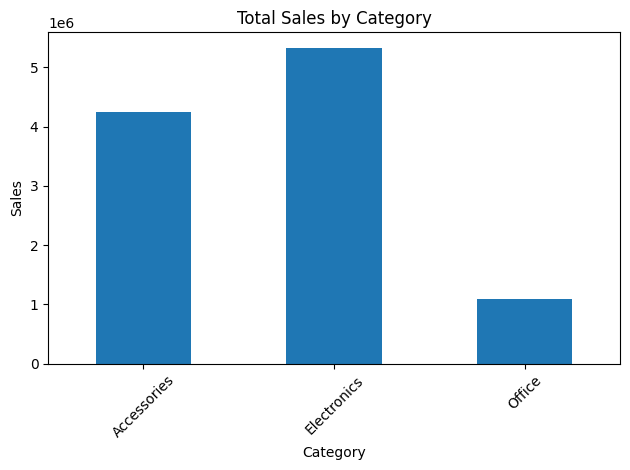

In [70]:
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**  
The Electronics category contributes the highest sales, indicating strong customer demand.


# Profit by Region

Text(0.5, 1.0, 'Profit By Region')

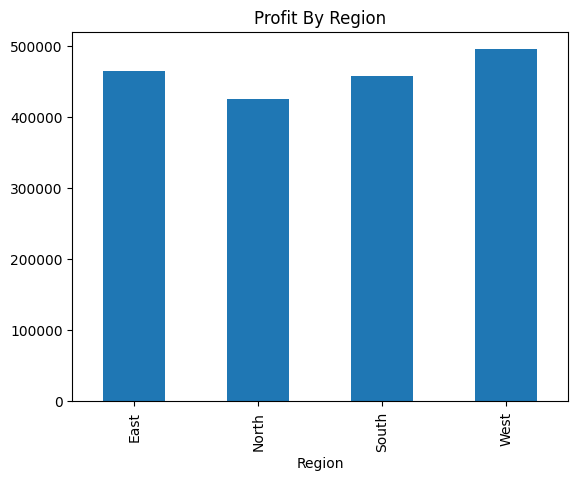

In [17]:
df.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.title('Profit By Region')

Region **WEST** contributes the highest profit.

## Day 1 Summary

- Loaded and explored the dataset
- Converted Order Date for time analysis
- Analyzed sales and profit by category and region
- Created initial visualization with insights


# Turn raw data into time-based insights and profitability analysis.
## 7. Feature Engineering: Time Variables

To analyze trends over time, new time-based features are extracted from Order Date.


In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [32]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()

In [34]:
df[['Order Date', 'Year', 'Month', 'Month_Name']].head(5)

,Order Date,Year,Month,Month_Name
0,2024-12-31,2024,12,December
1,2022-11-27,2022,11,November
2,2022-05-11,2022,5,May
3,2024-03-16,2024,3,March
4,2022-09-10,2022,9,September


## 8. Monthly Sales and Profit Trend

This analysis helps understand seasonal patterns and overall business growth.


In [46]:
monthly_trend = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()
monthly_trend.head()


,Year,Month,Sales,Profit
0,2022,1,341544,63827.33
1,2022,2,208775,34084.90
2,2022,3,294660,51931.81
3,2022,4,230624,44260.45
4,2022,5,314295,53504.97


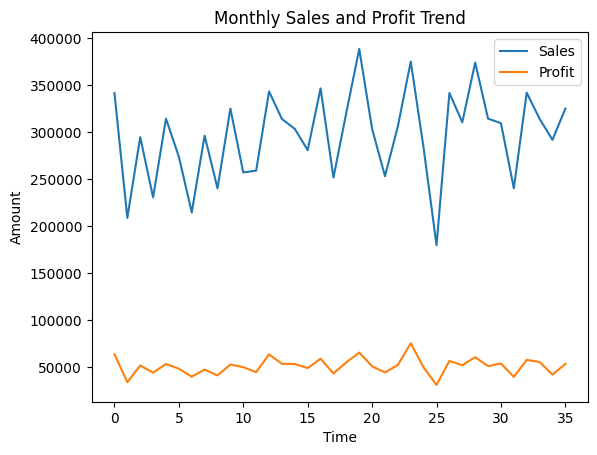

In [61]:
plt.figure()
plt.plot(monthly_trend['Sales'], label='Sales',)
plt.plot(monthly_trend['Profit'], label='Profit',)
plt.title("Monthly Sales and Profit Trend")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.show()

## 9. Profitability Analysis by Category


In [65]:
category_profit=df.groupby('Category')['Profit'].sum().sort_values()
category_profit

,Profit
Category,
Office,185394.88
Accessories,736084.74
Electronics,923185.59


(array([0, 1, 2]),
 [Text(0, 0, 'Office'), Text(1, 0, 'Accessories'), Text(2, 0, 'Electronics')])

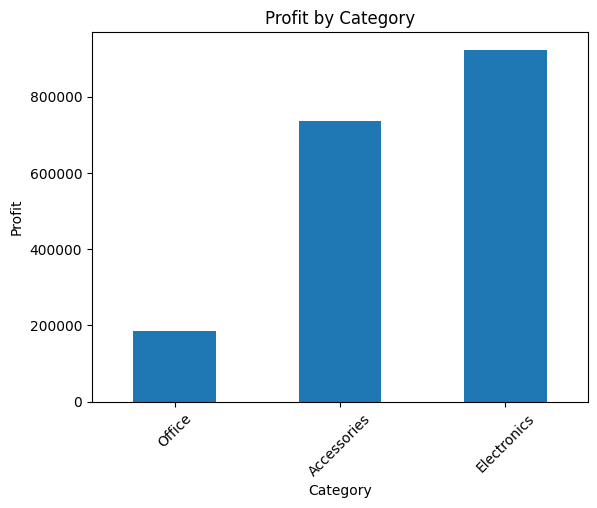

In [72]:
category_profit.plot(kind='bar')
plt.title("Profit by Category")
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)

**Insight:**  
The **office** category shows lowest profit and may require cost optimization or pricing review.


## 10. Loss-Making Products


In [79]:
df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

,Profit
Product Name,
Tablet,167505.01
Headphones,172478.20
Keyboard,175814.68
Smartwatch,178995.81
Smartphone,183296.97
Printer,185394.88
Laptop,185756.81
Mouse,185763.69
Monitor,202028.17


**Insight:**  
Certain products consistently generate losses, indicating potential issues in pricing, discounts, or logistics.


## 11. Profit Margin Analysis

Profit margin helps understand profitability relative to sales.


In [80]:
df['Profit_Margin']=(df['Profit']/df['Sales'])*100
df[['Sales', 'Profit', 'Profit_Margin']]

,Sales,Profit,Profit_Margin
0,3640,348.93,9.585989
1,1197,106.53,8.899749
2,5865,502.73,8.571697
3,786,202.87,25.810433
4,509,103.28,20.290766
...,...,...,...
3495,4064,771.16,18.975394
3496,1117,119.89,10.733214
3497,260,66.02,25.392308
3498,222,50.28,22.648649


Average Profit Margin by Category

In [83]:
df.groupby('Category')['Profit_Margin'].mean().sort_values()

,Profit_Margin
Category,
Office,17.283871
Accessories,17.333274
Electronics,17.417026


**Insight:**  
The highest average profit margin is observed in the **Electronics** category.


## Day 2 Summary

- Extracted time-based features from Order Date
- Analyzed monthly sales and profit trends
- Identified loss-making categories and products
- Calculated and compared profit margins across categories
